# Introduction
This report is a part of FracTracker's Summer 2024 Internship Project. In this report, we identify labeling issues found in the the title fields of FracTracker's Flickr photos. Implementing a consistent naming convention is an important first step towards automating the process of populating the FracTracker GIS map with relational photo data. We will highlight the attributes of the title field and key insights along the way.

### Data Source
The data used in this report is scraped from Fractracker's Flickr page found [here](https://www.flickr.com/photos/fractracker/albums/). The photos were captured and named by members of the FracTracker organization. These photos contain imagery of fracking sites and sites related to the fracking process. Most of the photos are located in the United States. These photos were taken in support of FracTracker's initiative to document environmental, health-related, and other impacts of fracking. This report is based on data scraped in July 2024.

In [230]:
# importing packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
# importing our data
df = pd.read_csv('cleaned_data.csv')

# Attributes of the data set

In [232]:
shape = df.shape # get its dimensions
print("This data set has", shape[0], "photos and", shape[1], "attributes per photo.")
print("The attributes in this data set are", list(df.columns))

This data set has 2710 photos and 15 attributes per photo.
The attributes in this data set are ['PhotoID', 'AlbumID', 'AlbumTitle', 'Title', 'Date_taken', 'Description', 'URL', 'Latitude', 'Longitude', 'Photo_src_URL', 'LightHawk', 'Mission', 'Mission Description', 'st_count', 'Title_photo_attr']


Here's a brief description of each of the attributes:

- `PhotoID`: Unique identifier for each photo scraped from Flickr
- `AlbumID`: List of IDs for the albums that contain the photo 
- `AlbumTitle`: List of titles for the albums 
- `Date_taken`: Date and time when the photo was taken 
- `Description`: Description of the photo entered on Flickr
- `Latitude`: Latitude where the photo was taken 
- `Longitude`: Longitude where the photo was taken 
- `Title`: Title of the photo entered on Flickr
- `LightHawk`: True or False value indicating whether the photographer used LightHawk to obtain the photo (pulled from the title column)
- `Mission`: The mission name associated with the photo (pulled from the title column)
- `Mission Description`: Detailed description of the mission (pulled from the title column)
- `st_count`: State and county information (pulled from the title column)
- `Title_photo_attr`: Attribution for the photo title (pulled from the title column)

## `PhotoID`

In [233]:
print('There are', len(df.PhotoID.unique()), 'unique PhotoIDs in this data set.')
print('There are', len(df[df.duplicated(subset = ['PhotoID']) == True]), 'repeat PhotoIDs in this data set.')


There are 2710 unique PhotoIDs in this data set.
There are 0 repeat PhotoIDs in this data set.


## `AlbumID` and `AlbumTitle`

In [234]:
df['AlbumID'] = df['AlbumID'].apply(lambda x: x.replace('[', ''))
df['AlbumTitle'] = df['AlbumTitle'].apply(lambda x: x.replace('[', ''))
df['AlbumID'] = df['AlbumID'].apply(lambda x: x.replace(']', ''))
df['AlbumTitle'] = df['AlbumTitle'].apply(lambda x: x.replace(']', ''))

df['AlbumTitle'] = df['AlbumTitle'].apply(lambda x: x.replace('\', ', '|'))
df['AlbumTitle'] = df['AlbumTitle'].apply(lambda x: x.replace('\'', ''))

In [235]:
alb_df = pd.DataFrame()
count = 0
for lis in df.AlbumTitle.apply(lambda x: x.split('|')):
    for item in lis:
        alb_df.loc[count, 'Album'] = item
        count+=1

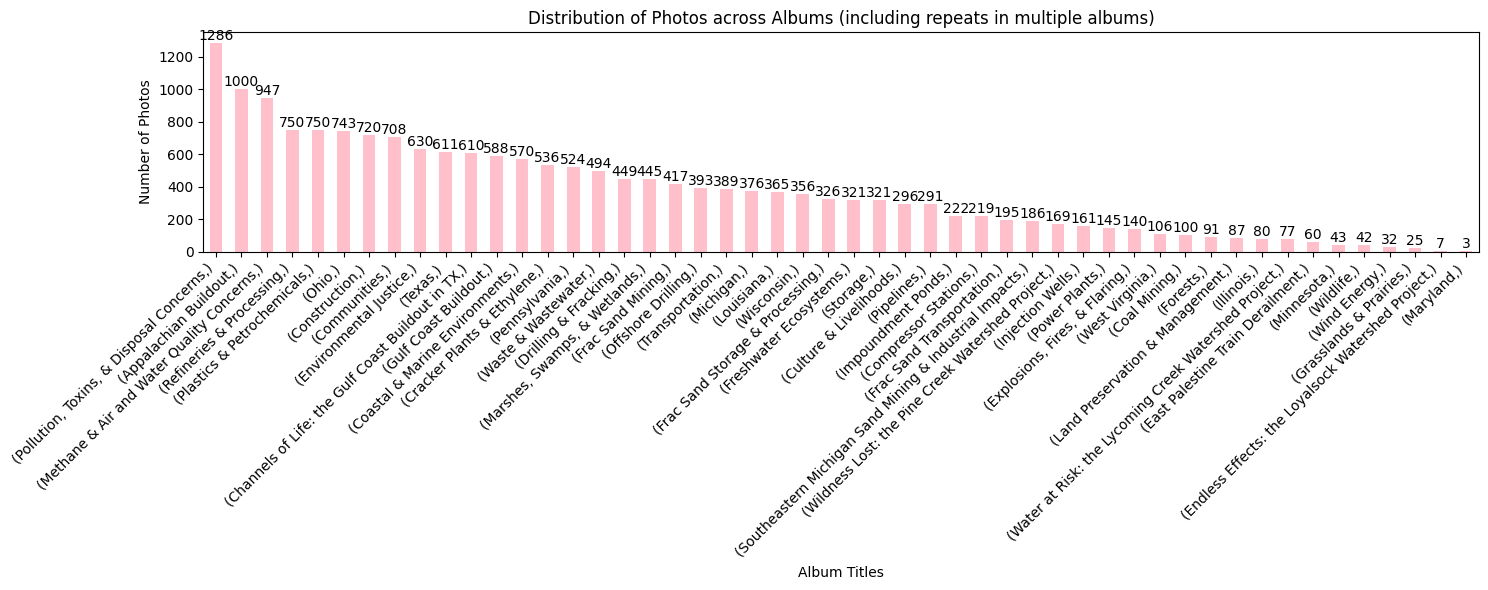

In [236]:
albs = alb_df.value_counts()

plt.figure(figsize=(15, 6))
bars = albs.plot(kind='bar', color='pink')

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Photos across Albums (including repeats in multiple albums)')
plt.xlabel('Album Titles')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

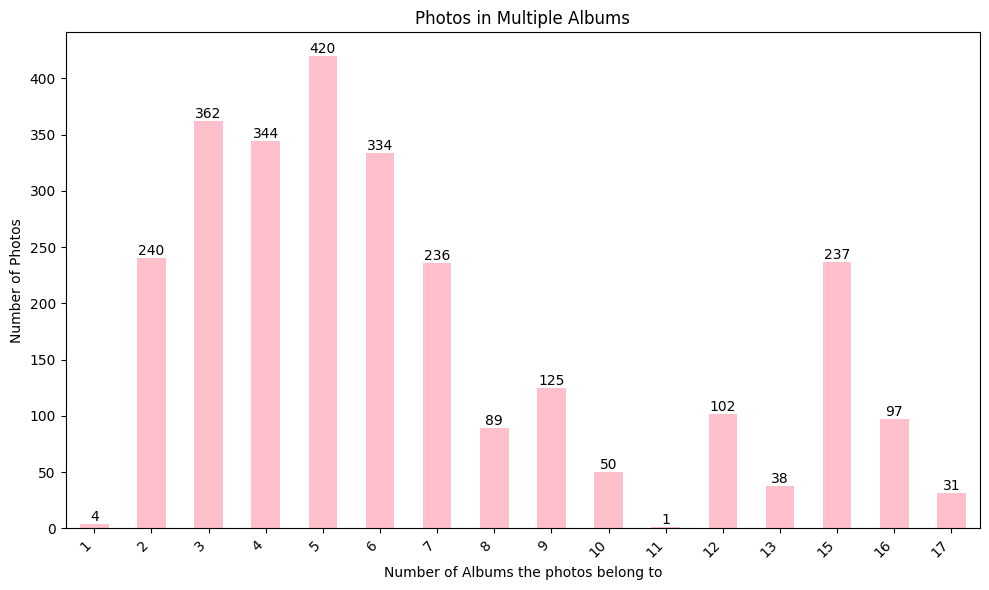

In [237]:
num_albums_per_pic = df.AlbumID.apply(lambda x: x.count(',')+1)
alb_counts = num_albums_per_pic.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = alb_counts.plot(kind='bar', color='pink')

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

plt.title('Photos in Multiple Albums')
plt.xlabel('Number of Albums the photos belong to')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

For example, there are 420 photos that are duplicated across 5 albums.

## `Date_taken`

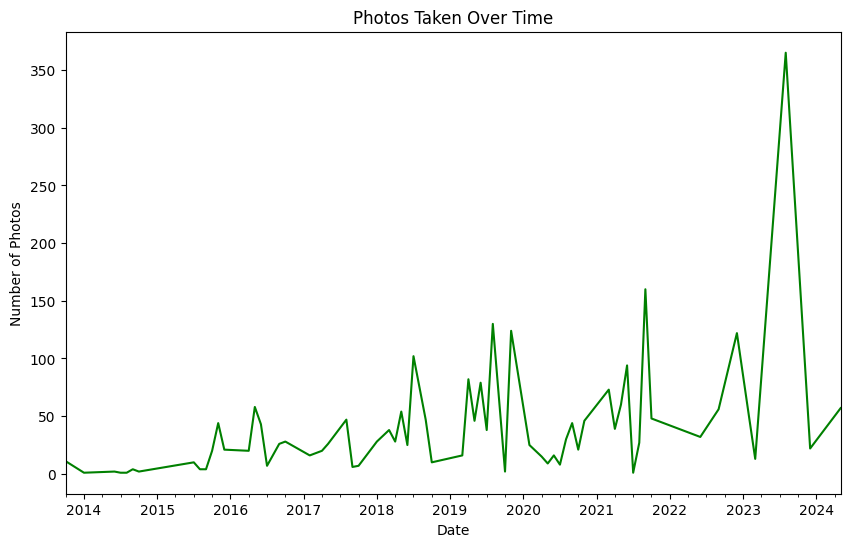

In [238]:
# Convert 'Date_taken' to datetime for time series plotting
df['Date_taken'] = pd.to_datetime(df['Date_taken'])

date_counts = df['Date_taken'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 6))
date_counts.plot(kind='line', color='green')
plt.title('Photos Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Photos')
plt.show()

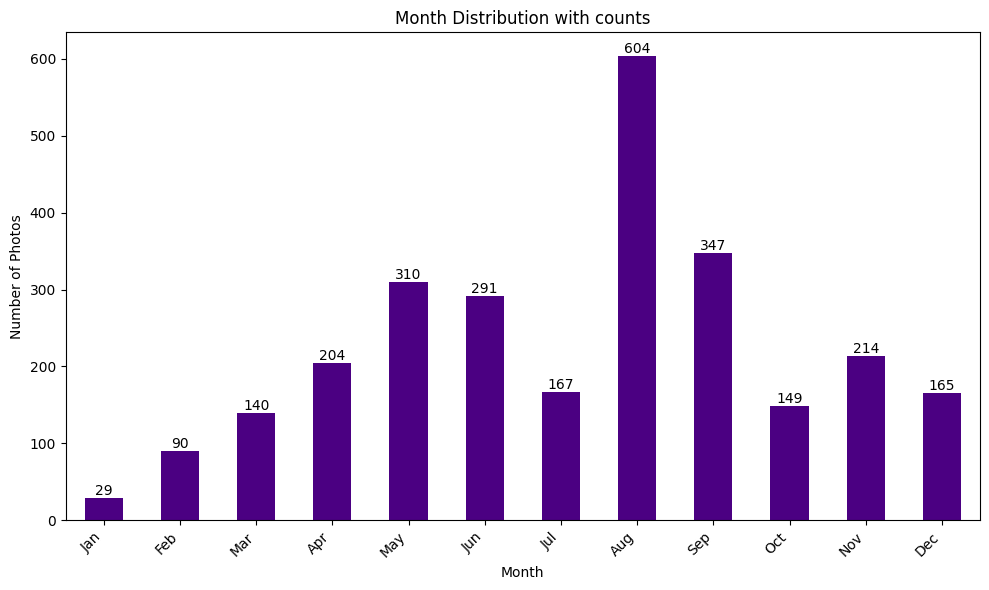

In [239]:
months = df['Date_taken'].apply(lambda x: x.month)
month_count = months.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = month_count.plot(kind='bar', color='indigo')

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)

bars.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Month Distribution with counts')
plt.xlabel('Month')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `Description`

In [240]:
print('There are', len(df.Description.unique()), 'unique photo descriptions. The most common one is:')
df.Description.value_counts().head(1)

There are 46 unique photo descriptions. The most common one is:


Description
Photo citation: Ted Auch, FracTracker Alliance, 2023.\n\nEach photo label provides this information, explained below: \n<i>Photographer_topic-sitespecific-siteowner-county-state_partneraffiliation_date(version)</i>\n\nPhoto labels provide information about what the image shows and where it was made. The label may describe the type of infrastructure pictured, the environment the photo captures, or the type of operations pictured. For many images, labels also provide site-specific information, including operators and facility names, if it is known by the photographer. \n\nAll photo labels include location information, at the state and county levels, and at township/village levels if it is helpful. Please make use of the geolocation data we provide - especially helpful if you want to see other imagery made nearby! \n\nWe encourage you to reach out to us about any imagery you wish to make use of, so that we can assist you in finding the best snapshots for your purposes, and so 

## `Latitude` and `Longitude`

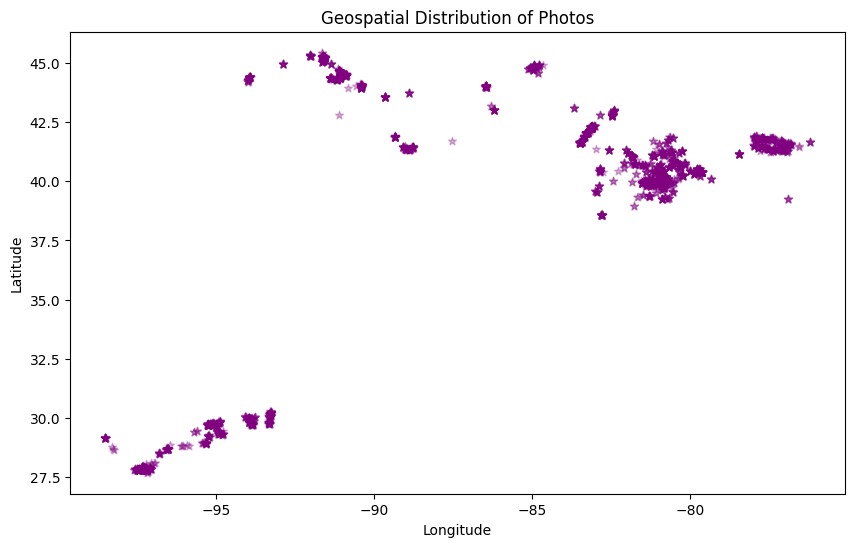

In [241]:
# Geospatial Distribution (Latitude vs Longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='purple', alpha=0.3, marker ='*')
plt.title('Geospatial Distribution of Photos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [242]:
print('There are', len(df[df['Latitude'].isna() == True]), 'photos missing a value for `Latitude`.')
print('There are', len(df[df['Longitude'].isna() == True]), 'photos missing a value for `Longitude`.')

There are 0 photos missing a value for `Latitude`.
There are 0 photos missing a value for `Longitude`.


## `Title`

In [243]:
s = df.loc[0,'Title'] # grab the first cell's contents of the Title column
print("An example from the title column:", s)

An example from the title column: TAuch_FracSand-Mine-WisconsinProppants-Hixton_WI_June2019


### Title Field Structure
The structure of the title field is explained under each photo's listed title as `Photographer_topic-sitespecific-siteowner-county-state_partneraffiliation_date(version)`. The structure we used to separate out the important attributes is as follows: `PhotoAttribution _ Type-of-Hazardous-Site _ CommercialName _ CountyState _ MonthYear`. From `Title`, we determined the following fields: `LightHawk`, `Mission`, `Mission Description`, `st_count`, `Title_photo_attr`

## `LightHawk`

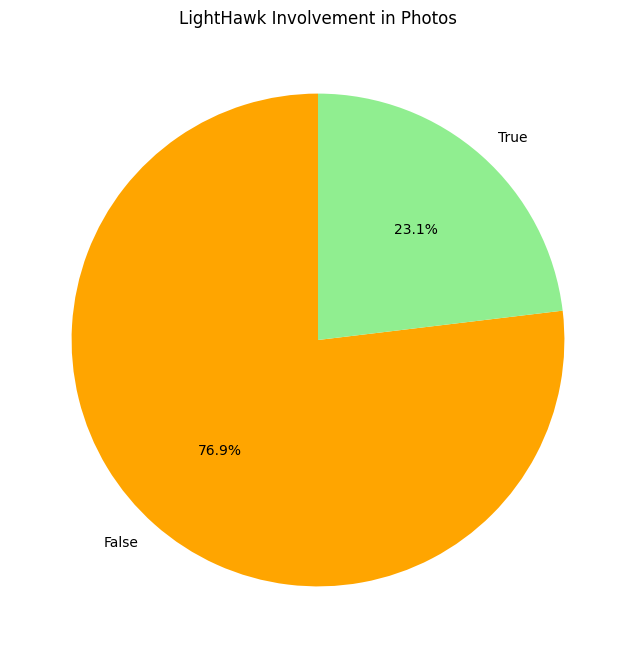

In [244]:
# LightHawk Involvement
lighthawk_counts = df['LightHawk'].value_counts()

plt.figure(figsize=(8, 8))
lighthawk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'lightgreen'])
plt.title('LightHawk Involvement in Photos')
plt.ylabel('')
plt.show()

## `Mission`

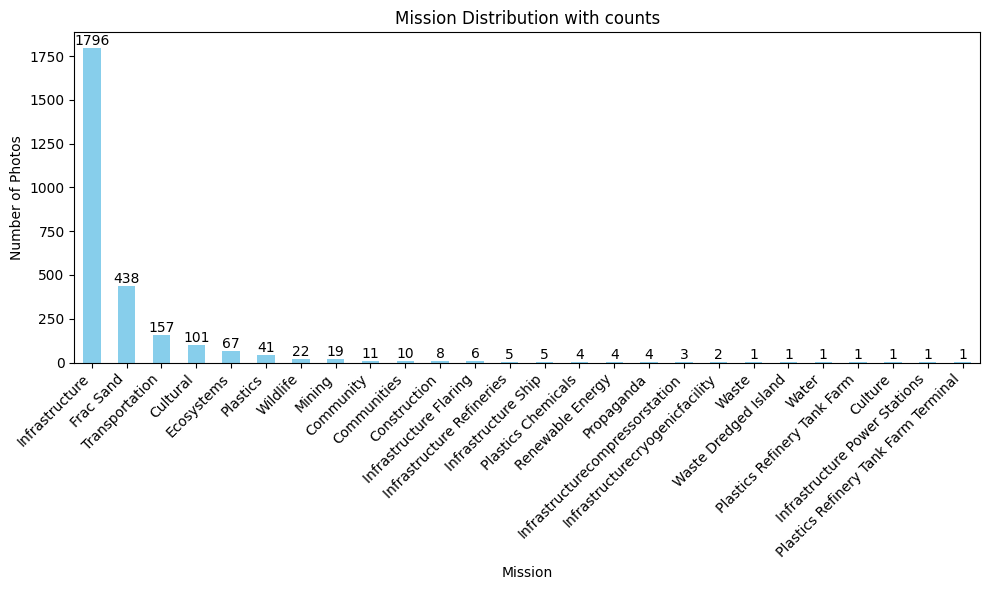

In [245]:
# Mission Distribution
mission_counts = df['Mission'].value_counts()

# Plot the Mission Distribution with counts on top of each bar
plt.figure(figsize=(10, 6))
bars = mission_counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)


plt.title('Mission Distribution with counts')
plt.xlabel('Mission')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `Mission Description`

In [246]:
print('There are', len(df['Mission Description'].value_counts()), 'unique Mission Descriptions.')

There are 976 unique Mission Descriptions.


In [247]:
mission_df = pd.DataFrame(df['Mission Description'].value_counts().head())
print('Most Used Mission Descriptions:')
mission_df

Most Used Mission Descriptions:


,count
Mission Description,
Frack Pad Pine Creek Watershed,22
L N G Export Terminal Cheniere Energy Cameron Parish,21
Fracking Metis Pad Westmoreland County,18
Mine Sargent Sand Ludington,18
Mine Fairmount Santrol Wedron,17


## `st_count`

In [248]:
print('The photos in this data set are located in', len(df.st_count.value_counts()), 'counties.')

The photos in this data set are located in 102 counties.


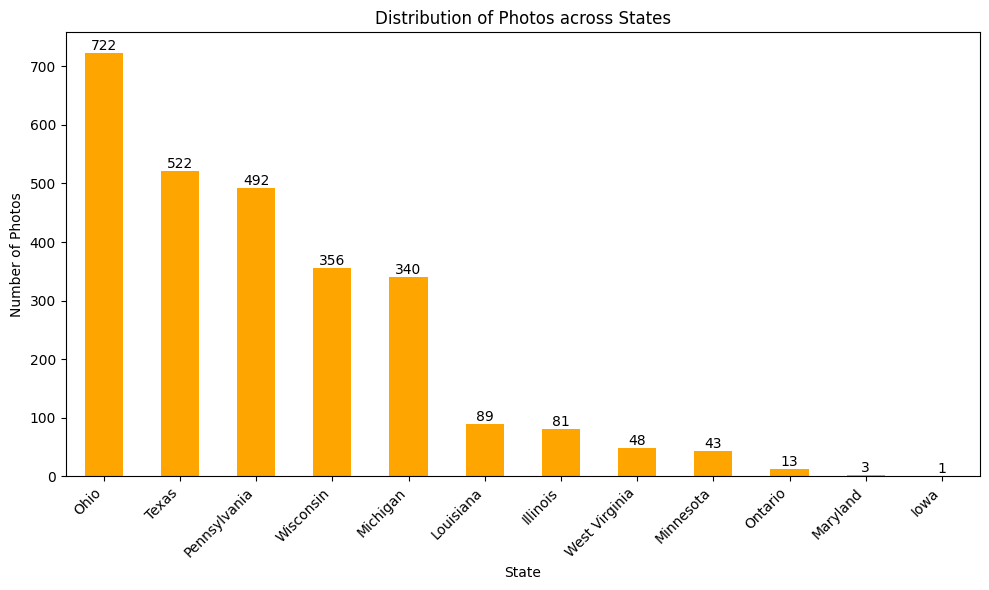

In [249]:
states = df.st_count.apply(lambda x: x.split(', ')[1])

state_counts = states.value_counts()

# Plot the Mission Distribution with counts on top of each bar
plt.figure(figsize=(10, 6))
bars = state_counts.plot(kind='bar', color='orange')

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)


plt.title('Distribution of Photos across States')
plt.xlabel('State')
plt.ylabel('Number of Photos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `Title_photo_attr`

In [250]:
photo_attribution = df['Title_photo_attr'].unique()
print('Unique photo contibutors:', photo_attribution)
print('Number of unique photo contibutors:', len(photo_attribution))

Unique photo contibutors: ['TAuch' 'LDaul' 'HBoschen' 'RZarwell' 'MWhipple' 'BLenker' 'SRubright'
 'BHughes' 'EJackson' 'SSmith' 'KEdelstein' 'MKelso' 'RJohnson' 'DMartin']
Number of unique photo contibutors: 14


In [251]:
attr = df['Title_photo_attr'].apply(lambda x: 'TAuch' if x == 'TAuch' else 'Other')
attr_counts = attr.value_counts()

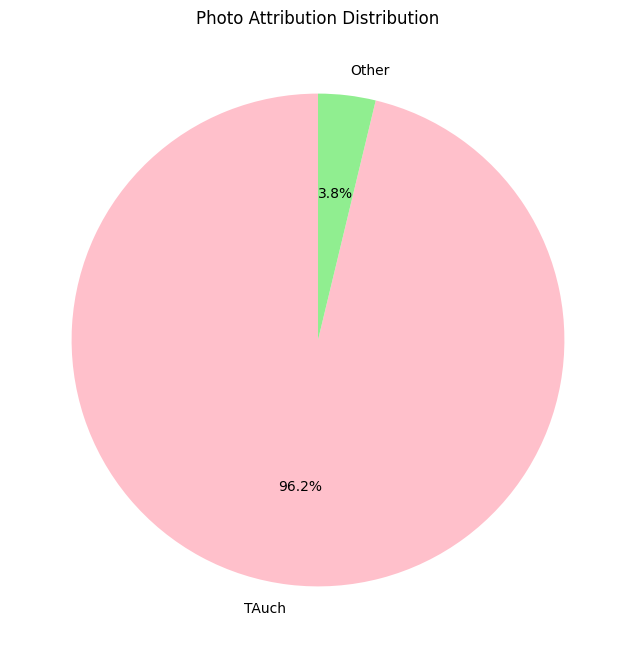

In [252]:
plt.figure(figsize=(8, 8))
attr_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['pink', 'lightgreen'])
plt.title('Photo Attribution Distribution')
plt.ylabel('')
plt.show()